In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import backtrader as bt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import backtrader as bt
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
#Strategy
class StrategyMaster(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.val_start = self.broker.get_cash()
        self.dataclose = self.datas[0].close
        self.buy_count = 0
        self.sell_count = 0
    
    def next(self):    
        days = 15
        data = {
                'Close' : [self.dataclose[i] for i in range(-days + 1, 1)],
                'row_num' : [i for i in range(0, days)]
            }
        df = pd.DataFrame (data, columns = ['Close', 'row_num'])
        stock_df = df
        X = stock_df[['row_num']]
        y = stock_df.Close
        
    
        poly_features = PolynomialFeatures(degree = 2, include_bias = False)
        X_poly = poly_features.fit_transform(X)
        reg_f = LinearRegression()
        reg_f.fit(X_poly, y)
        predicted = reg_f.predict([[days, (days)^2]])[0]
        
        
        if self.dataclose[0] < predicted:
            if (len(self.position) == 0):
                self.order = self.order_target_percent(target=1)
                self.buy_count += len(self.position)
        if self.dataclose[0] > predicted:
            self.order = self.sell(size=len(self.position))
            self.sell_count += len(self.position)
    
    def stop(self):
        print("Position:", self.getposition().size)
        self.roi = (self.broker.get_value() / self.val_start) - 1.0
        print('ROI:        {:.2f}%'.format(100.0 * self.roi))
        print('Buy count:', self.buy_count)
        print('Sell count:', self.sell_count)

Starting Portfolio Value: $1000000.00
Position: 0
ROI:        41.50%
Buy count: 0
Sell count: 267092
Final Portfolio Value: $1415003.07
P/L: $415003.06999999983


<IPython.core.display.Javascript object>


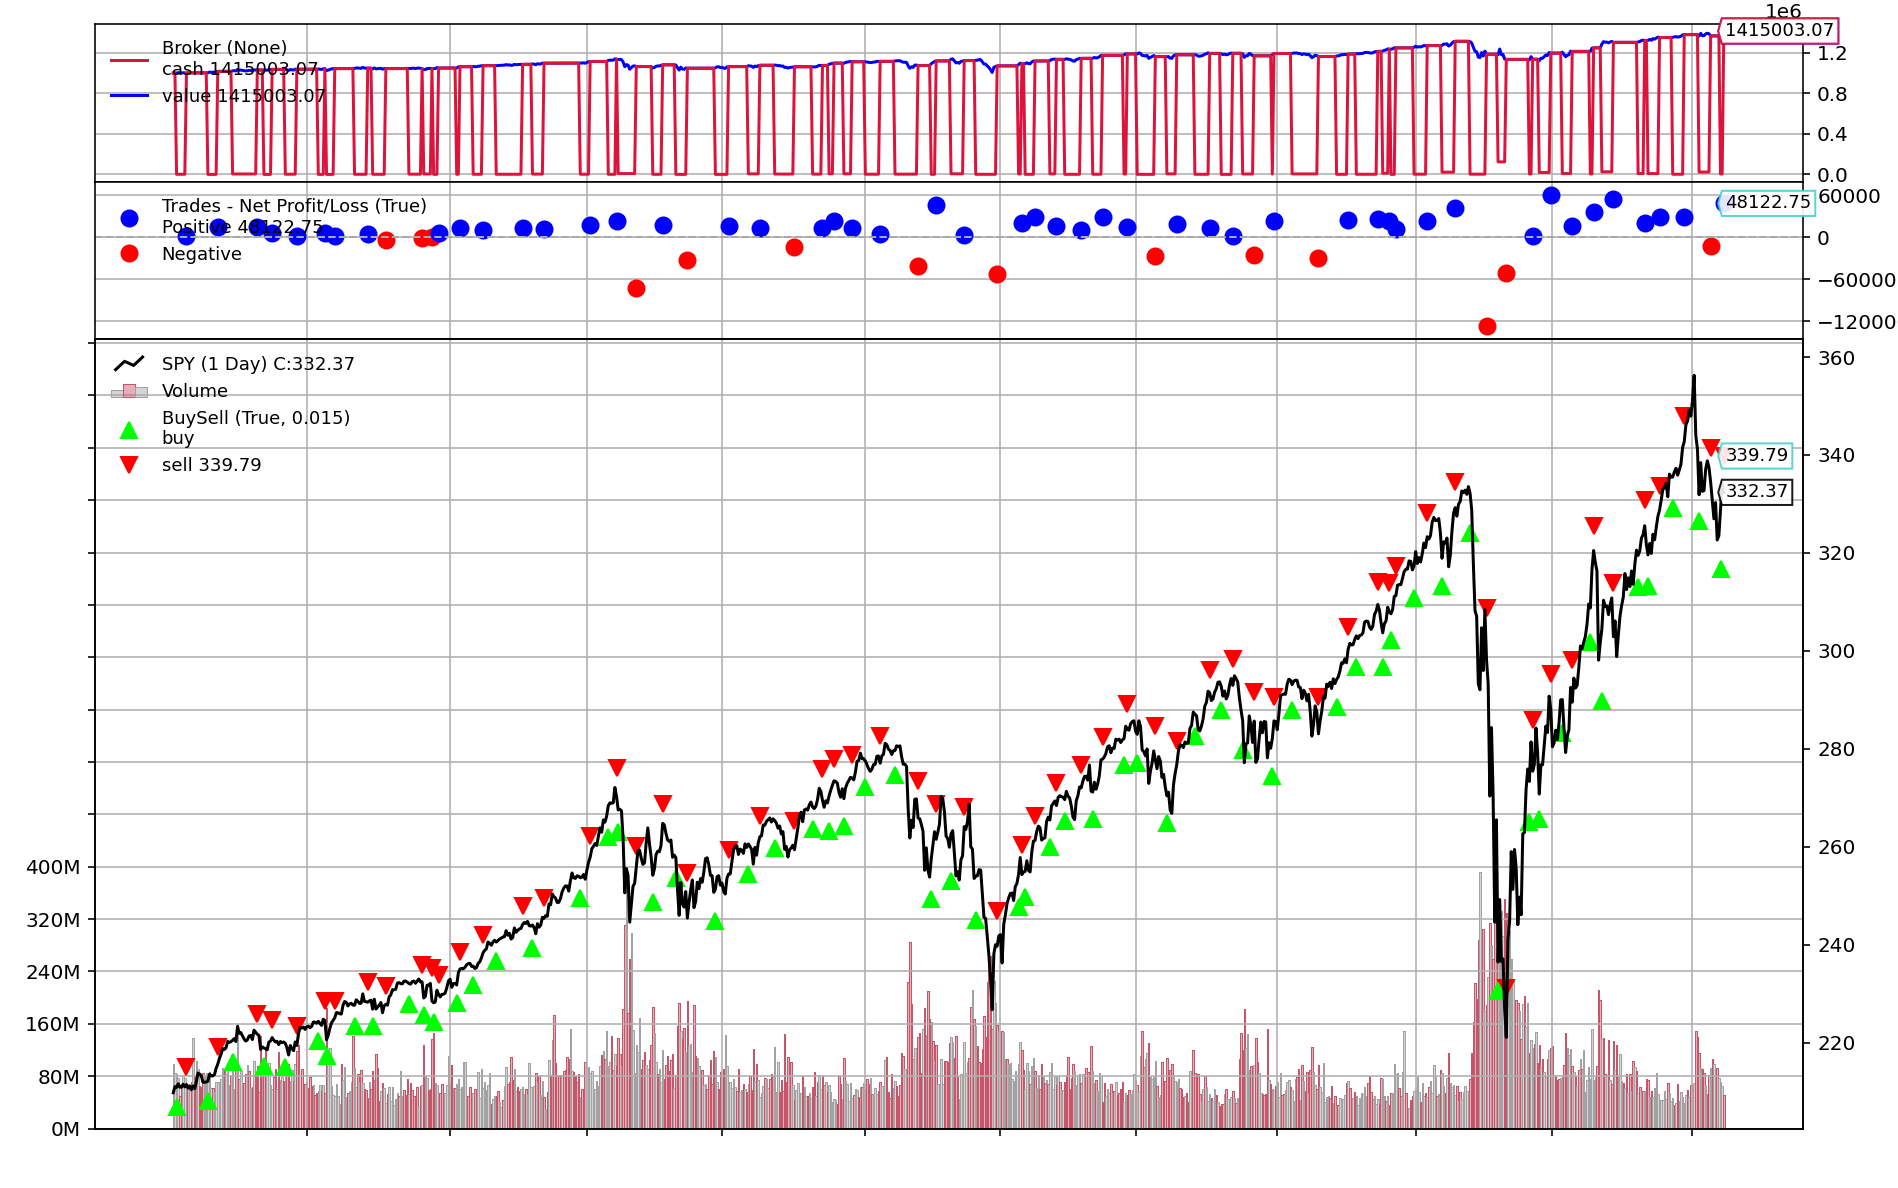

[[<Figure size 432x288 with 4 Axes>]]

In [6]:
# from https://backtest-rookies.com/2017/06/02/getting-started-first-script/

# set starting cash
startcash = 1000000

cerebro = bt.Cerebro()
broker = bt.brokers.BackBroker(shortcash=False)
cerebro.broker = broker 
cerebro.addstrategy(StrategyMaster)


# Get SPY data from Yahoo Finance
data = bt.feeds.YahooFinanceData(dataname='SPY',
                                 fromdate = datetime(2017, 1, 1),
                                 todate = datetime(2020, 9, 30)
                                )
cerebro.adddata(data)
cerebro.broker.setcash(startcash)

print('Starting Portfolio Value: $%.2f' % cerebro.broker.getvalue())

# start backtest here
cerebro.run()

#Get final portfolio Value
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash

#Print out the final result
print('Final Portfolio Value: $%.2f' % cerebro.broker.getvalue())
print('P/L: ${}'.format(pnl))

#Finally plot the end results
cerebro.plot()

In [54]:
# buy and hold P/L: $576803.3700000001